In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Dataset
df=pd.read_csv("data_Proj_2.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
#Converting target column into numeric
# We'll use dictionary encoding
Class_dict={"DERMASON":0,"SIRA":1,"SEKER":2,"HOROZ":3,"CALI":4,"BARBUNYA":5,"BOMBAY":6}
df["Class_enc"]=df.Class.map(Class_dict)

In [4]:
df1=df.drop(["Class"],axis=1)

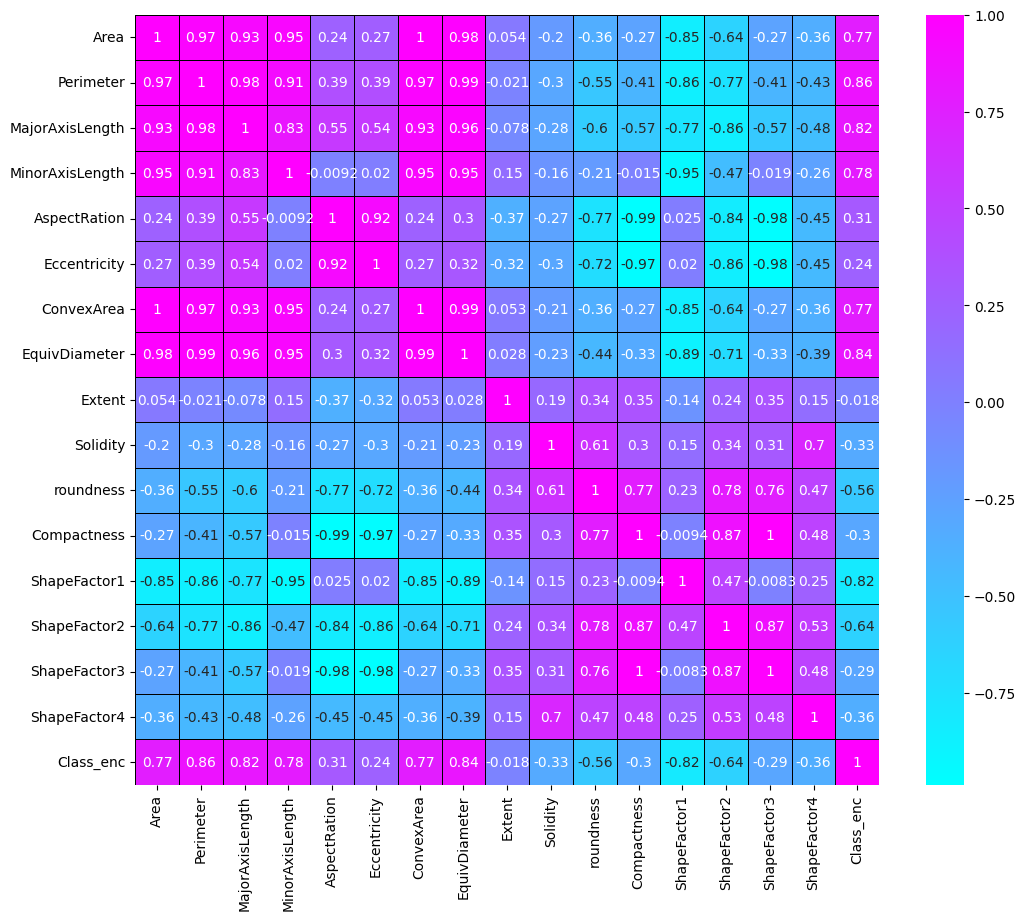

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,cmap="cool",linewidths=0.7,linecolor="black")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(df1.iloc[:, :-1])
df1=pd.DataFrame(data_scaled,columns=df1.columns[:-1])
df1.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [7]:
X=df1
y=df["Class_enc"]

In [8]:
df1.shape

(13611, 16)

In [9]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (13611, 16)
y Shape:  (13611,)


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

            feature  importance
12     ShapeFactor1    0.086956
14     ShapeFactor3    0.080904
11      Compactness    0.080346
4      AspectRation    0.078815
13     ShapeFactor2    0.078363
1         Perimeter    0.077839
7     EquivDiameter    0.075057
3   MinorAxisLength    0.070892
2   MajorAxisLength    0.067757
0              Area    0.066970
6        ConvexArea    0.060726
5      Eccentricity    0.057884
10        roundness    0.057217
15     ShapeFactor4    0.028514
9          Solidity    0.017198
8            Extent    0.014562


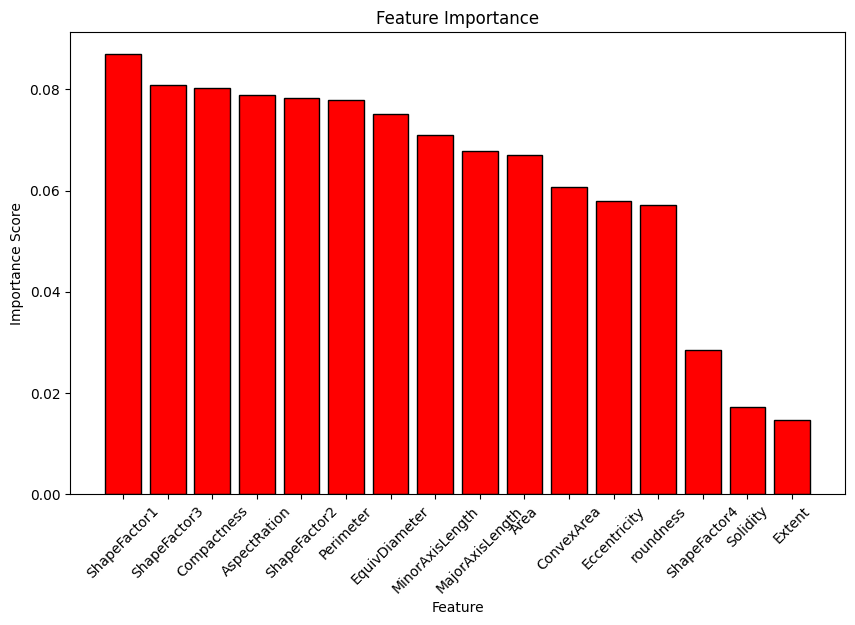

In [11]:
#plotting Feature Importance
plt.figure(figsize=(10,6))
plt.bar(feature_importances['feature'], feature_importances['importance'],color="red",edgecolor="black")
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [12]:
X=df1.drop(["Extent","Solidity","ShapeFactor4"],axis=1)
y=df["Class_enc"]

In [13]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (13611, 13)
y Shape:  (13611,)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (10888, 13)
X_test:  (2723, 13)
y_train:  (10888,)
y_test:  (2723,)


### 1.Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#Accuracy On training set
print("Accuracy on training : ",lr.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",lr.score(X_test,y_test))

Accuracy on training :  0.9133908890521675
Accuracy on testing :  0.9144326110907087


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[602  60   9   0   0   0   0]
 [ 42 472  11   8   2   1   0]
 [ 10  11 386   0   0   6   0]
 [  6   6   0 388   5   3   0]
 [  0   3   0   4 298  12   0]
 [  0   8   2   1  23 227   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9144326110907087
recall:  0.9144326110907087
Precison:  0.9144326110907087
F1-score:  0.9144326110907087
Specifity:  0.9093655589123867


### 2.SVM

In [18]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [19]:
#Accuracy On training set
print("Accuracy on training : ",sv.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",sv.score(X_test,y_test))

Accuracy on training :  0.9187178545187362
Accuracy on testing :  0.9206757253029747


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=sv.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[612  52   7   0   0   0   0]
 [ 45 476   7   7   0   1   0]
 [ 12   9 388   0   0   4   0]
 [  6   7   0 387   5   3   0]
 [  0   4   0   4 301   8   0]
 [  0   6   1   1  27 226   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9206757253029747
recall:  0.9206757253029747
Precison:  0.9206757253029747
F1-score:  0.9206757253029747
Specifity:  0.9216867469879518


### 3.Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

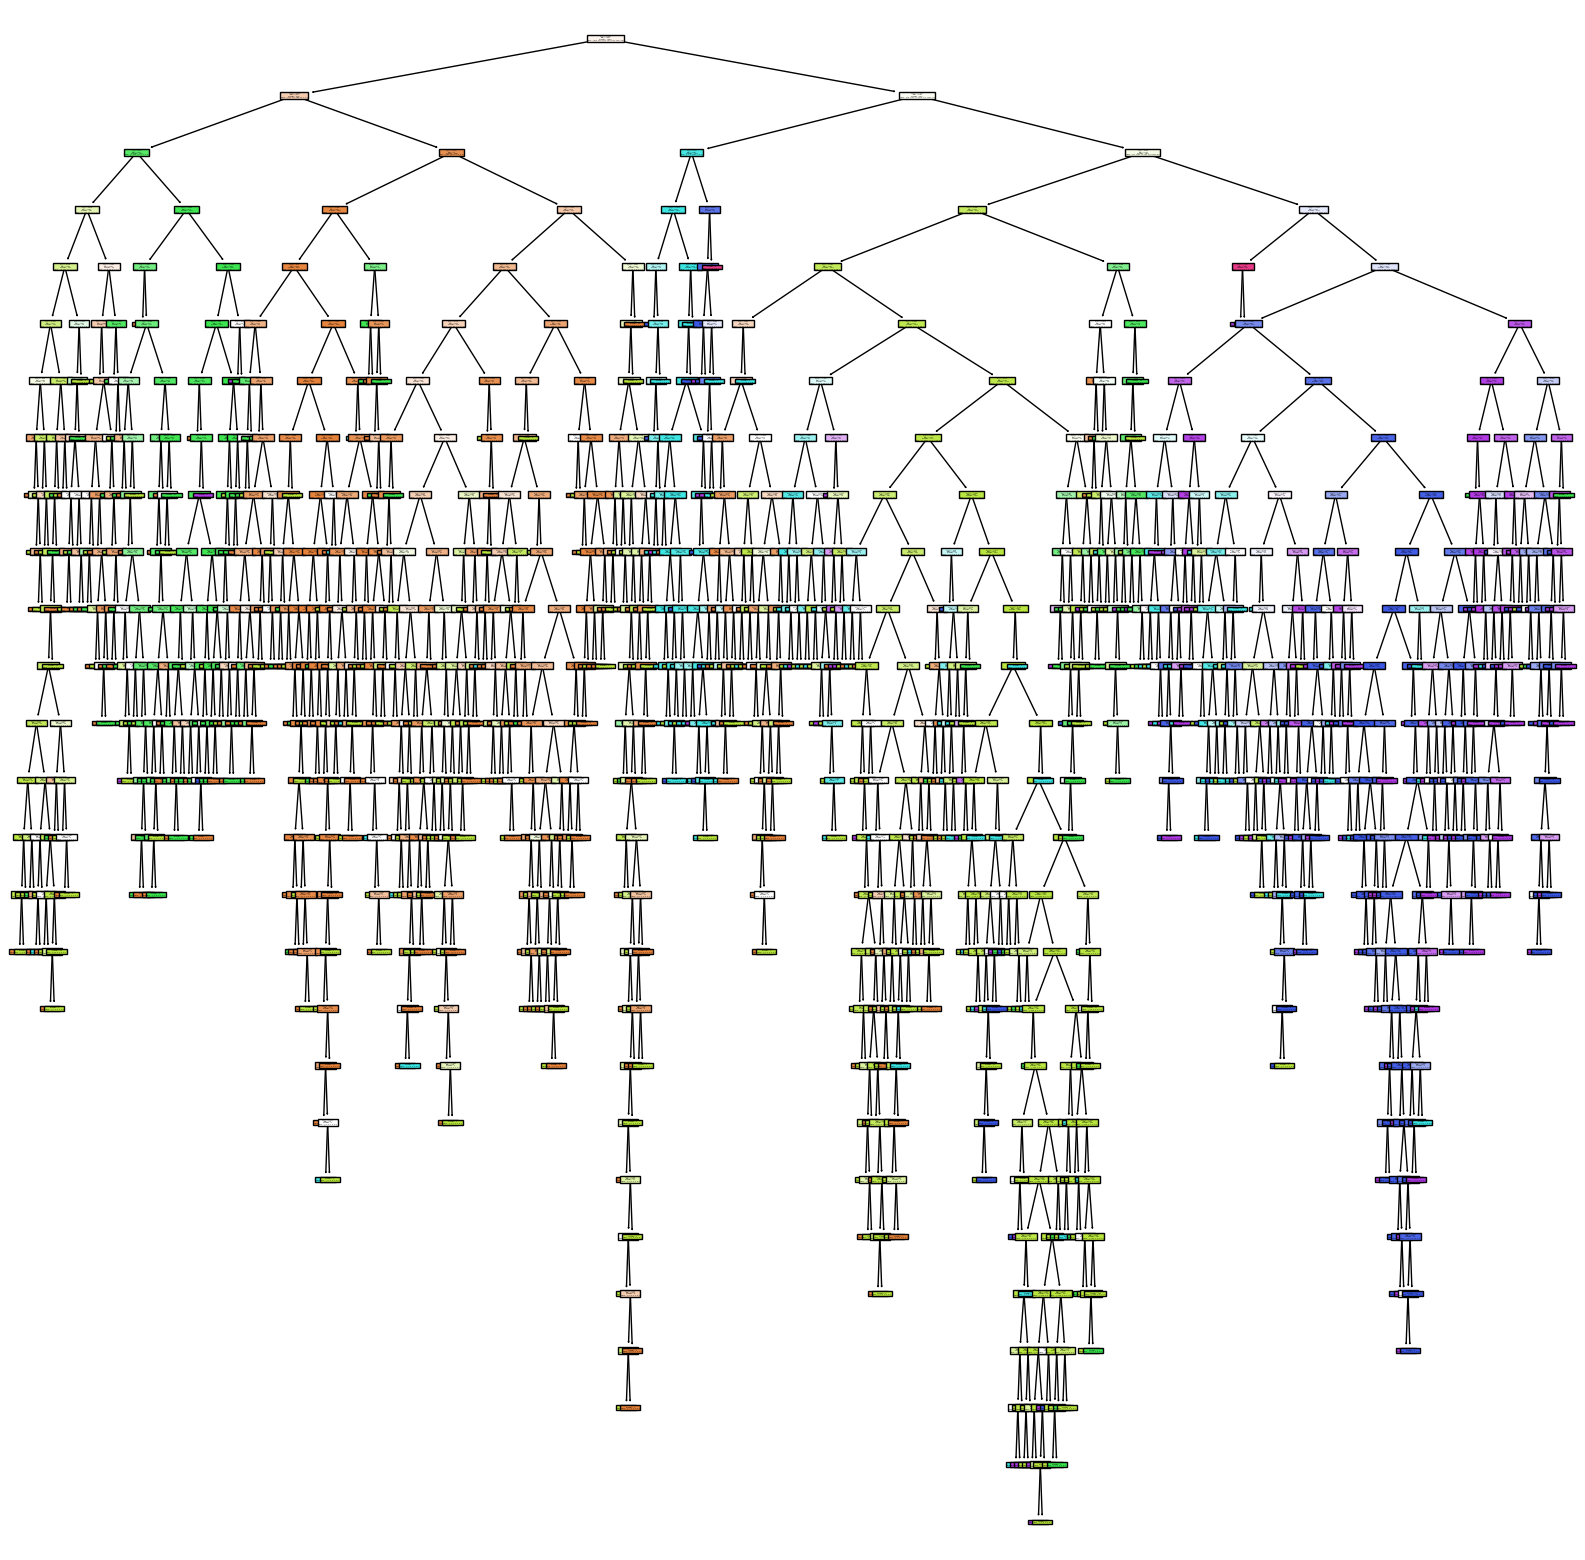

In [22]:
#Visualizing Tree
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

In [23]:
#Accuracy On training set
print("Accuracy on training : ",dt.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",dt.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.8857877341167829


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=dt.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[591  64  13   3   0   0   0]
 [ 57 445  17  12   1   4   0]
 [ 18  18 373   1   1   2   0]
 [  3   7   0 383  10   5   0]
 [  0   2   0   4 282  29   0]
 [  1   6   3   1  29 221   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.8857877341167829
recall:  0.8857877341167829
Precison:  0.8857877341167829
F1-score:  0.8857877341167829
Specifity:  0.9022900763358779


### 4.Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
#Accuracy On training set
print("Accuracy on training : ",rf.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",rf.score(X_test,y_test))

Accuracy on training :  0.9999081557678178
Accuracy on testing :  0.9159015791406537


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=rf.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[614  46   9   2   0   0   0]
 [ 48 464  15   9   0   0   0]
 [ 15  12 383   0   0   3   0]
 [  3   5   0 390   7   3   0]
 [  0   2   0   3 299  13   0]
 [  0   7   2   1  24 227   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9159015791406537
recall:  0.9159015791406537
Precison:  0.9159015791406537
F1-score:  0.9159015791406537
Specifity:  0.9303030303030303


### 5.Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [29]:
#Accuracy On training set
print("Accuracy on training : ",nb.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",nb.score(X_test,y_test))

Accuracy on training :  0.8885011021307861
Accuracy on testing :  0.8949687844289387


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve
y_pred=nb.predict(X_test)
print("confusion matrix:\n",
      confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[0,1]))

confusion matrix:
 [[581  73  17   0   0   0   0]
 [ 34 474  12  12   0   4   0]
 [  5  12 391   0   0   5   0]
 [  6   4   0 391   5   2   0]
 [  0   1   0   4 281  31   0]
 [  0  13   1   1  44 202   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.8949687844289387
recall:  0.8949687844289387
Precison:  0.8949687844289387
F1-score:  0.8949687844289387
Specifity:  0.8883792048929664
